# Market Value Developer Roles

Notebook for wrangling and reviewing data; seeking insights and opportuinies for refactoring. 

https://www.itjobswatch.co.uk

### Cleaning data

To reduce data redundancy, low information rows can be filtered out. Possible criteria could be found in:
* `median_salary` of 0; no indication of value
* Low number of `historical_ads`, 1 dosent quite indicate the existance of a job.
* 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/data.csv")
df.head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419
1,Developer,2,-1,50000,7.52,43794,28.86,10376
2,Finance,3,0,60000,9.09,31221,20.58,4946
3,SQL,4,0,48513,7.80,30300,19.97,5600
4,JavaScript,5,0,50000,11.11,26285,17.32,6126


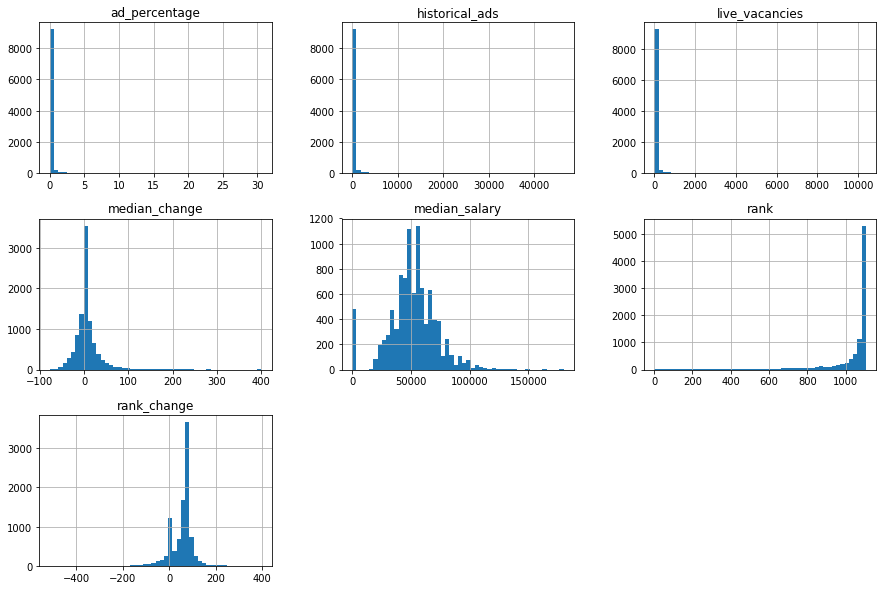

In [2]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [3]:
df.sort_values(by=['median_salary'], ascending=False).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
8164,Contract Management Executive,1103,0,180000,0.00,3,0.002,0
7986,Chief Software Architect,1103,74,165000,83.33,3,0.002,0
5499,Enterprise Solution Manager,1093,83,150000,66.66,13,0.009,1
8374,Slurm Workload Manager,1104,70,150000,284.61,2,0.001,6
9647,Quantitative Strategist,1105,0,150000,0.00,1,0.001,0


In [4]:
df.sort_values(by=['median_salary']).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies
7718,Geospatial Analyst,1102,0,0,0.0,4,0.003,0
9150,Senior Ab Initio Developer,1105,0,0,0.0,1,0.001,1
4461,Elastic Path,1084,82,0,0.0,22,0.015,2
7502,TIBCO Architect,1102,65,0,0.0,4,0.003,5
4471,DesignOps,1084,73,0,0.0,22,0.015,2


In [5]:
df['total_ads'] = df.historical_ads + df.live_vacancies
# df['desirability'] = df.live_vacancies / df.total_ads

In [15]:
print(df.shape)
dfx = df.loc[df['historical_ads'] > 3]
print(dfx.shape)

(9690, 9)
(7749, 9)


In [16]:
dfx = df.loc[df['median_salary'] > 0]
print(dfx.shape)

(9209, 9)


In [17]:
dfx.head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies,total_ads
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419,54800
1,Developer,2,-1,50000,7.52,43794,28.86,10376,54170
2,Finance,3,0,60000,9.09,31221,20.58,4946,36167
3,SQL,4,0,48513,7.80,30300,19.97,5600,35900
4,JavaScript,5,0,50000,11.11,26285,17.32,6126,32411


In [10]:
dfx.sort_values(by=['ad_percentage'], ascending=False).head()

,skill,rank,rank_change,median_salary,median_change,historical_ads,ad_percentage,live_vacancies,total_ads
0,Agile Software Development,1,1,55000,4.76,46381,30.57,8419,54800
1,Developer,2,-1,50000,7.52,43794,28.86,10376,54170
2,Finance,3,0,60000,9.09,31221,20.58,4946,36167
3,SQL,4,0,48513,7.80,30300,19.97,5600,35900
4,JavaScript,5,0,50000,11.11,26285,17.32,6126,32411


In [73]:
def search(df, technology):
    query = "^{t}\s|\s{t}$|\s{t}\s|^{t}$".format(t=technology)
    return df[df['skill'].str.contains(query, case=False)]

def condensed(df, technologies):
    x = []
    for tech in technologies: 
        c = search(df, tech)
        x.append({
            'skill': tech,
            'live_vacancies': c['live_vacancies'].sum(), 
            'total_ads': c['total_ads'].sum(), 
            'median_salary': c['median_salary'].median(),
            'median_change': c['median_change'].mean(),
            'rank_change': c['rank_change'].mean()
        })
    return pd.DataFrame(x)

In [80]:
technologies = {'HTML','CSS','JavaScript','Angular','React','TypeScript',
                'Java','MySQL','Spring','Hibernate','Automation','Selenium',
                'Python','Django','SQL','Android','iOS','Full Stack',
                'Docker','Kubernetes','Agile','Git','C','C#'}

x = condensed(df, technologies)

In [83]:
x.sort_values(by=['live_vacancies'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
9,12969,4.255517,50000.0,30.344828,SQL,86845
15,9247,-1.092759,60000.0,43.413793,Agile,62095
7,8813,3.866744,47500.0,19.093023,C#,56118
21,8381,9.106932,62500.0,48.806818,Java,54681
10,6968,15.080000,52500.0,4.375000,JavaScript,36895


In [84]:
x.sort_values(by=['median_salary'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
16,1935,2.080000,63750.0,125.000000,Docker,10180
21,8381,9.106932,62500.0,48.806818,Java,54681
23,1750,11.941429,60000.0,57.000000,Spring,10502
15,9247,-1.092759,60000.0,43.413793,Agile,62095


In [85]:
x.sort_values(by=['median_change'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
12,4208,23.838000,47500.0,7.600000,CSS,21500
19,1277,17.783571,56250.0,33.714286,iOS,6994
10,6968,15.080000,52500.0,4.375000,JavaScript,36895
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
23,1750,11.941429,60000.0,57.000000,Spring,10502


In [86]:
x.sort_values(by=['rank_change'], ascending=False).head()

,live_vacancies,median_change,median_salary,rank_change,skill,total_ads
14,1174,13.093333,75000.0,156.000000,Kubernetes,5687
16,1935,2.080000,63750.0,125.000000,Docker,10180
18,2529,3.990000,58750.0,100.250000,React,11945
17,613,5.000000,52500.0,97.000000,TypeScript,2717
1,4005,3.607143,56250.0,69.857143,Python,23640
